# Time Series Final Project 

### `1- Importing Libraries`

In [1]:
# importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

plt.style.use('ggplot')

### `2- Retrieving Data`

In [2]:
# Retrieving Data 
light_cars_sales = pd.read_csv("datasets/LTOTALNSA.csv", index_col='DATE', parse_dates=True) 
light_cars_sales.rename(columns={"LTOTALNSA":"SALES"}, inplace=True)
light_cars_sales

,SALES
DATE,
1976-01-01,864.600
1976-02-01,973.300
1976-03-01,1216.100
1976-04-01,1163.200
1976-05-01,1176.100
...,...
2021-11-01,1014.411
2021-12-01,1203.993
2022-01-01,989.560


### `3-Time Series Visualization`

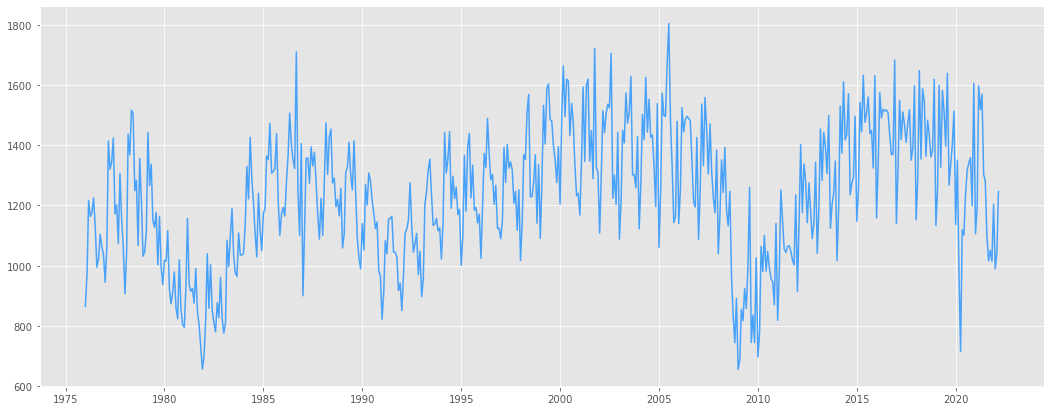

In [3]:
fig, ax = plt.subplots(figsize=(18,7))
ax.plot(light_cars_sales, c='#48A1FA')
plt.show()

### `4-Extracting Time Series Components`

In [4]:
from statsmodels.tsa.seasonal import seasonal_decompose

ss_decomposition = seasonal_decompose(x=light_cars_sales, model='multiplicative', period=12)
estimated_trend = ss_decomposition.trend
estimated_seasonal = ss_decomposition.seasonal
estimated_residual = ss_decomposition.resid

### `5-Visualizing Time Series Components`

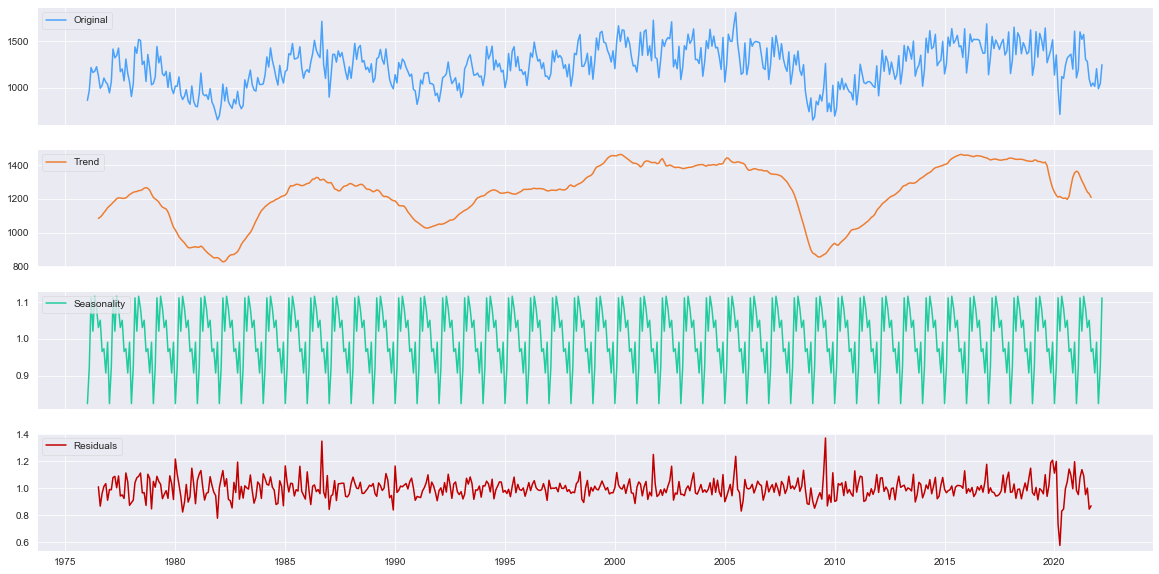

In [5]:
sns.set_style("darkgrid")
fig, axes = plt.subplots(4, 1, sharex=True, sharey=False, figsize=(20,10))

axes[0].plot(light_cars_sales, label='Original', c="#48A1FA")
axes[0].legend(loc='upper left');

axes[1].plot(estimated_trend, label='Trend', c="#ED7D31")
axes[1].legend(loc='upper left');

axes[2].plot(estimated_seasonal, label='Seasonality', c="#1FCC9E")
axes[2].legend(loc='upper left');

axes[3].plot(estimated_residual, label='Residuals', c="#C00000")
axes[3].legend(loc='upper left');

### `5-Checking for Stationarity, White Noise, Random walk`

#### `5.1-Finding the mean of time series` 

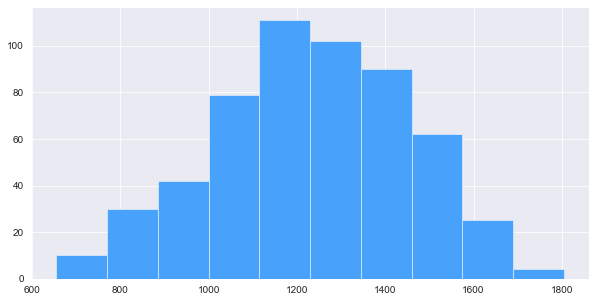

In [11]:
pd.Series(light_cars_sales['SALES']).hist(color='#48A1FA', figsize=(10,5));

In [12]:
# splitting the time series into 15 equaled chunks
ts_chunks = np.split(light_cars_sales['SALES'], 15)

means = np.round(np.mean(ts_chunks, axis=1),2)
stds = np.round(np.std(ts_chunks, axis=1),2)

chunks_df = pd.DataFrame({"chunks": list(range(1, len(ts_chunks)+1)), "mean_vals":means, "variance_vals":stds })
chunks_df

,chunks,mean_vals,variance_vals
0,1,1175.11,167.12
1,2,972.92,172.35
2,3,1050.63,167.83
3,4,1291.27,144.99
4,5,1180.35,146.79
5,6,1128.57,143.98
6,7,1246.83,114.67
7,8,1368.84,165.20
8,9,1401.86,160.68
9,10,1396.98,165.80


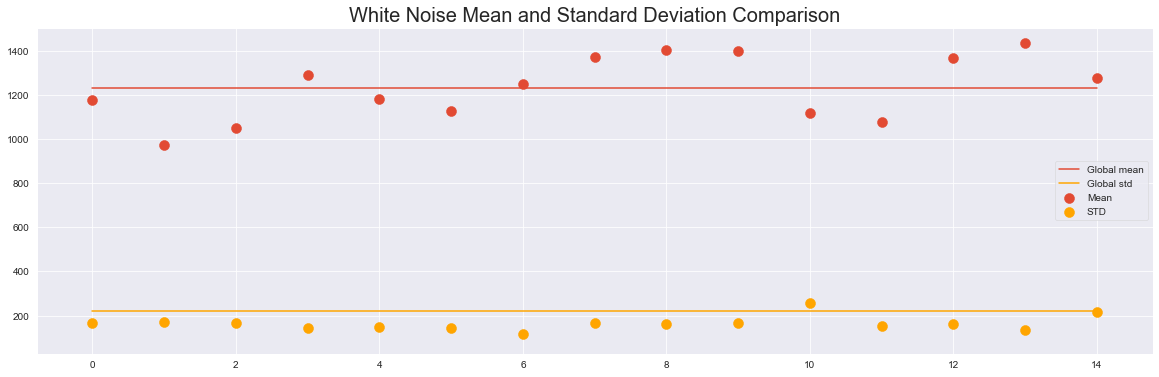

In [13]:
# comparing between means and standard deviations of time series chunks 
mean_time_axis = np.arange(len(means))
std_time_axis = np.arange(len(stds))

# graph preferences 
plt.rcParams["figure.figsize"] = (20,6)
plt.title('White Noise Mean and Standard Deviation Comparison', size=20)

# plotting the actual mean of time series 
plt.plot(mean_time_axis, [light_cars_sales.mean()] * len(means), 
         label='Global mean', lw=1.5)

# plotting the chunked means 
plt.scatter(mean_time_axis, y=means, label='Mean', s=100)

# plotting the actual standard deviation of time series 
plt.plot(std_time_axis, [light_cars_sales.std()] * len(stds),
         label='Global std', lw=1.5, color='orange')

# plotting the chunked standard deviations
plt.scatter(std_time_axis, y=stds, label='STD', color='orange', s=100)

plt.legend();

#### `5.2- Autocorrelation plots`

In [14]:
from statsmodels.graphics.tsaplots import acf, plot_acf

ac_values = np.round(acf(light_cars_sales['SALES'],  fft=False),2)
ac_values

c:\Users\MOHAMAD\AppData\Local\Programs\Python\Python36\lib\site-packages\statsmodels\tsa\stattools.py:662: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  FutureWarning,


array([1.  , 0.69, 0.63, 0.6 , 0.47, 0.45, 0.39, 0.42, 0.42, 0.53, 0.52,
       0.55, 0.74, 0.52, 0.5 , 0.46, 0.34, 0.32, 0.26, 0.28, 0.29, 0.37,
       0.36, 0.4 , 0.54, 0.34, 0.31, 0.26, 0.16, 0.13, 0.06, 0.09, 0.09,
       0.18, 0.19, 0.21, 0.35, 0.18, 0.13, 0.09, 0.  ])

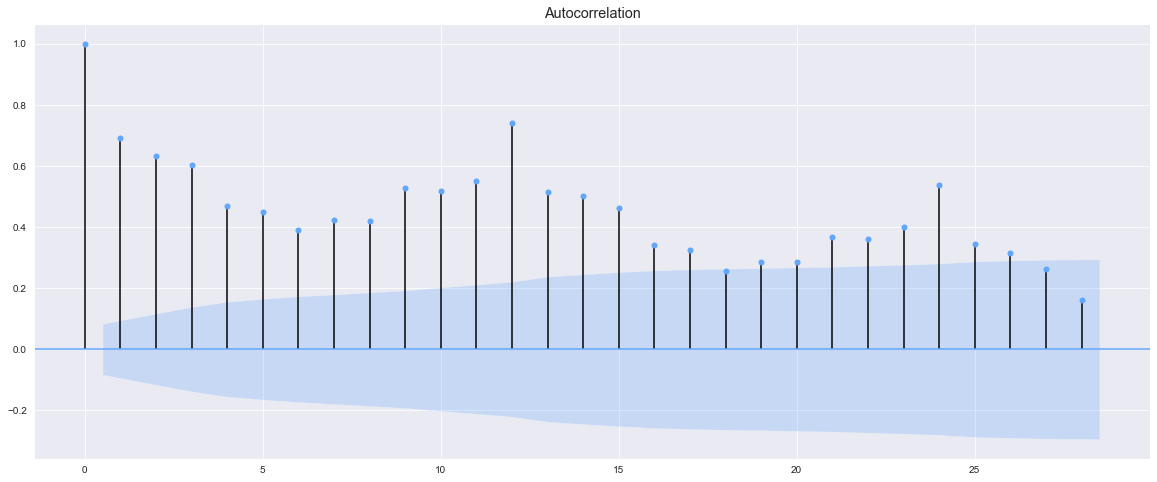

In [15]:
from matplotlib.collections import PolyCollection
fig, ax = plt.subplots(figsize=(20,8))
plot_acf(light_cars_sales, ax=ax, 
         color='#60A6FB',  
         vlines_kwargs={"colors": '#000000'})

for item in ax.collections:
    if type(item)==PolyCollection:
        item.set_facecolor('#60A6FB')

plt.show()

* `Autocorrelation on first-order difference`

In [31]:
light_cars_sales['SALES_FIRST_DIFF'] = light_cars_sales['SALES'].diff(periods=1)
light_cars_sales = light_cars_sales.dropna()

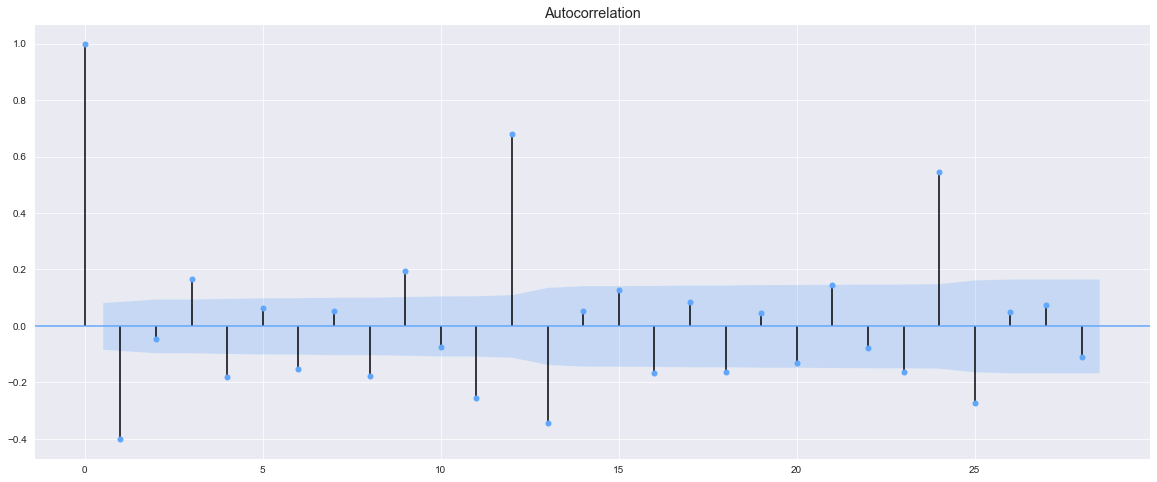

In [17]:
from matplotlib.collections import PolyCollection
fig, ax = plt.subplots(figsize=(20,8))
plot_acf(light_cars_sales['SALES_FIRST_DIFF'], ax=ax, 
         color='#60A6FB',  
         vlines_kwargs={"colors": '#000000'})

for item in ax.collections:
    if type(item)==PolyCollection:
        item.set_facecolor('#60A6FB')

plt.show()

#### `5.3-Partial Autocorrelation plots`

In [18]:
from statsmodels.graphics.tsaplots import pacf, plot_pacf

pacf_values = pacf(light_cars_sales['SALES'], nlags=30)
np.round(pacf_values, 2)


array([ 1.  ,  0.69,  0.3 ,  0.19, -0.11,  0.06, -0.01,  0.2 ,  0.08,
        0.35,  0.  ,  0.16,  0.47, -0.4 , -0.04, -0.1 , -0.08, -0.04,
       -0.09,  0.03,  0.01, -0.02,  0.05,  0.03,  0.07, -0.15, -0.19,
       -0.05, -0.02, -0.09, -0.04])

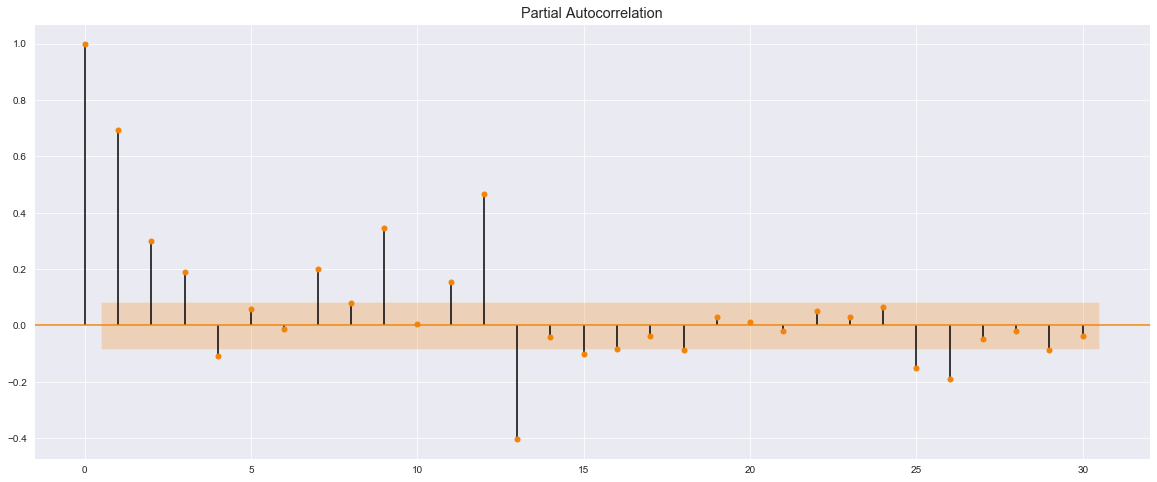

In [19]:
# Plot partial autocorrelation
fig, ax = plt.subplots(figsize=(20,8))

plot_pacf(light_cars_sales['SALES'], 
          lags=30, ax=ax, color='#F38307',  
          vlines_kwargs={"colors": '#000000'})

for item in ax.collections:
    if type(item)==PolyCollection:
        item.set_facecolor('#F38307')

plt.show()

* `partial autocorrelation on first-order difference`

In [20]:
pacf_values = pacf(light_cars_sales['SALES_FIRST_DIFF'], nlags=25)
np.round(pacf_values, 2)


array([ 1.  , -0.4 , -0.25,  0.06, -0.11, -0.04, -0.24, -0.11, -0.36,
       -0.01, -0.16, -0.47,  0.41,  0.04,  0.1 ,  0.08,  0.03,  0.07,
       -0.04, -0.03,  0.02, -0.06, -0.04, -0.08,  0.14,  0.17])

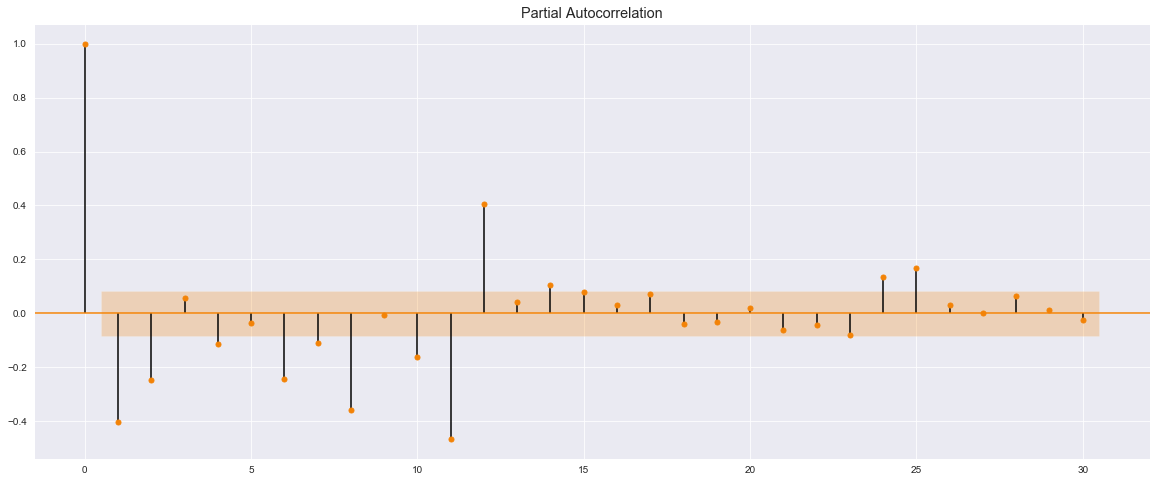

In [21]:
# Plot partial autocorrelation
fig, ax = plt.subplots(figsize=(20,8))

plot_pacf(light_cars_sales['SALES_FIRST_DIFF'], 
          lags=30, ax=ax, color='#F38307',  
          vlines_kwargs={"colors": '#000000'})

for item in ax.collections:
    if type(item)==PolyCollection:
        item.set_facecolor('#F38307')

plt.show()

#### `5.4 Augmented Dickey-Fuller Test (Stationarity Test)`


In [23]:
from statsmodels.tsa.stattools import adfuller

adf, pvalue, usedlag, nobs, critical_values, icbest = adfuller(light_cars_sales['SALES'])

A brief discussion about the important outputs from the ADF test is in order. 

In [24]:
print(adf)

-2.829277524541586


First, **adf** is the value of the test statistic. The more negative the value, the more confident we can be that the series is stationary. Here we see a value of -2.83. That may not mean anything to you just yet but the **pvalue** should.

In [25]:
print(pvalue)

0.05421184907221919


In [26]:
print(nobs)

536


In [27]:
print(critical_values)

{'1%': -3.442609129942274, '5%': -2.866947348175723, '10%': -2.569649926626197}


### `6- Smoothing Time Series`

In [32]:
import sys, os
import statsmodels as ss
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings
os.chdir('data')
from colorsetup import colors, palette
sns.set_palette(palette)

warnings.filterwarnings("ignore")

In [34]:
def run_sequence_plot(x, y, title, xlabel="time", ylabel="series"):
    plt.plot(x, y, 'k-')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(alpha=0.3);

In [35]:
#### MSE Function
### Let's create a Mean Squared Error function that we can use going forward.

def mse(observations, estimates):
    '''
    INPUT:
        observations - numpy array of values indicating observed values
        estimates - numpy array of values indicating an estimate of values
    OUTPUT:
        Mean Square Error value
    '''
    # check arg types
    assert type(observations) == type(np.array([])), "'observations' must be a numpy array"
    assert type(estimates) == type(np.array([])), "'estimates' must be a numpy array"
    # check length of arrays equal
    assert len(observations) == len(estimates), "Arrays must be of equal length"
    
    # calculations
    difference = observations - estimates
    sq_diff = difference ** 2
    mse = sum(sq_diff)
    
    return mse

#### `6.1 Simple Smoothing`

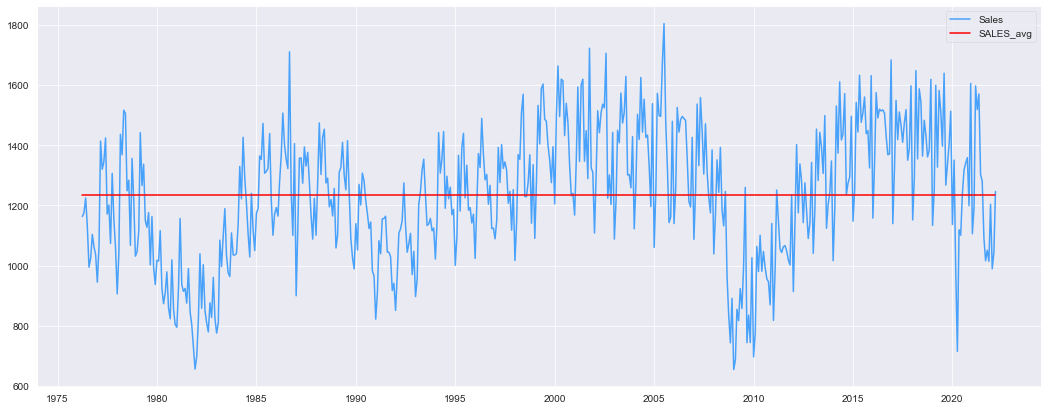

Mean Square Error: 26380517.872153617


In [66]:
# find mean of series
time_series_avg = np.mean(light_cars_sales['SALES'])

# create array of mean value equal to length of time array
light_cars_sales['SALES_avg'] = np.full(shape=len(light_cars_sales), fill_value=time_series_avg, dtype='float')

fig, ax = plt.subplots(figsize=(18,7))
ax.plot(light_cars_sales['SALES'], c='#48A1FA')
ax.plot(light_cars_sales['SALES_avg'], c='red')
plt.legend(['Sales', 'SALES_avg'])
plt.show()

print(f"Mean Square Error: {mse(np.array(light_cars_sales['SALES']), np.array(light_cars_sales['SALES_avg']))}")

light_cars_sales.drop(['SALES_avg'], axis=1, inplace=True)


#### `6.2 moving average Smoothing`

In [102]:
def moving_average(observations, window=3, forecast=False):
    '''returns the smoothed version of an array of observations.'''
    cumulative_sum = np.cumsum(observations, dtype=float)
    cumulative_sum[window:] = cumulative_sum[window:] - cumulative_sum[:-window]
    if forecast:
        return np.insert(cumulative_sum[window - 1:] / window, 0, np.zeros(3))
    else:
        return cumulative_sum[window - 1:] / window

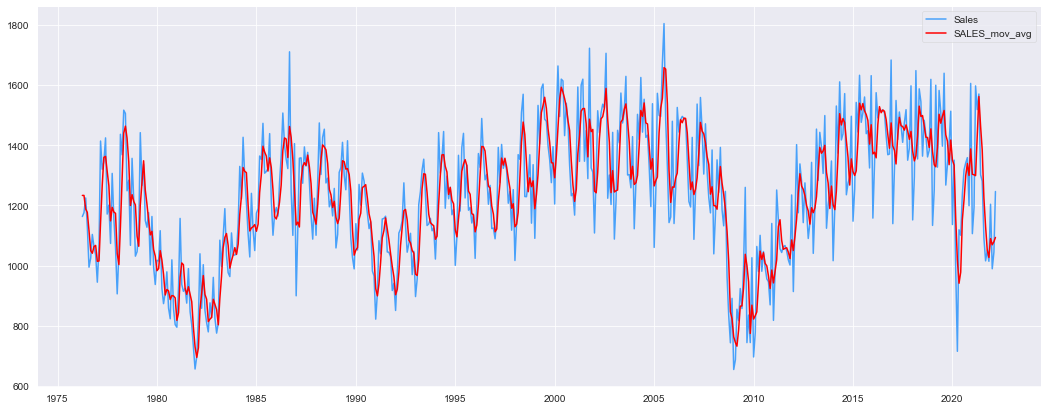

Mean Square Error: 6074348.431498482


In [103]:
mean = np.mean(light_cars_sales['SALES'])
SALES_mov_avg = moving_average(np.array(light_cars_sales['SALES']), window=3, forecast=False)
SALES_mov_avg = np.insert(SALES_mov_avg,[0],[mean,mean])
light_cars_sales['SALES_mov_avg']  = SALES_mov_avg

fig, ax = plt.subplots(figsize=(18,7))
ax.plot(light_cars_sales['SALES'], c='#48A1FA')
ax.plot(light_cars_sales['SALES_mov_avg'], c='red')

plt.legend(['Sales', 'SALES_mov_avg'])
plt.show()

print(f"Mean Square Error: {mse(np.array(light_cars_sales['SALES']), np.array(light_cars_sales['SALES_mov_avg']))}")

light_cars_sales.drop(['SALES_mov_avg'], axis=1, inplace=True)

#### `6.3 Exponential Smoothing`

In [129]:
def ewma(observations, forecast=True):
    '''returns the exponentially weighted smoothed version of an array of observations.'''
    weights = np.array([0.160, 0.294, 0.543])
    output = np.zeros_like(observations, dtype='float')
    
    for i, _ in enumerate(observations):
        if (i == 0) or (i == 1) or (i == len(observations) - 1):
            pass
        else:
            output[i] = np.dot(observations[i-2:i+1], weights)
    if forecast:
        return np.insert(output, 0, mean)
    else:
        return output

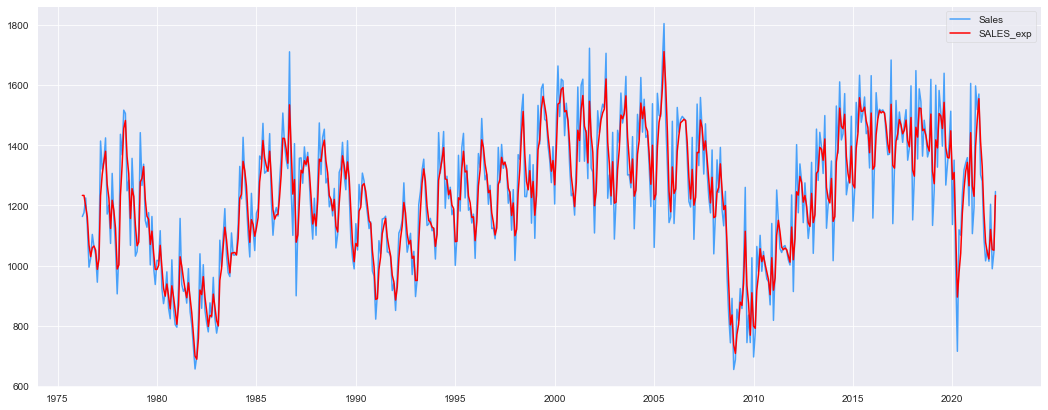

Mean Square Error: 2820822.767729523


In [138]:
mean = np.mean(light_cars_sales['SALES'])
ewma_smoothed_vals = ewma(light_cars_sales['SALES'], forecast=False)
np.place(ewma_smoothed_vals, ewma_smoothed_vals==0, mean)
light_cars_sales['SALES_exp'] = ewma_smoothed_vals

fig, ax = plt.subplots(figsize=(18,7))
ax.plot(light_cars_sales['SALES'], c='#48A1FA')
ax.plot(light_cars_sales['SALES_exp'], c='red')

plt.legend(['Sales', 'SALES_exp'])
plt.show()

print(f"Mean Square Error: {mse(np.array(light_cars_sales['SALES']), np.array(light_cars_sales['SALES_exp']))}")

light_cars_sales.drop(['SALES_exp'], axis=1, inplace=True)

#### `6.4 Forecasting by smoothing techniques`

In [181]:
# Splitting the data 
train = np.array(light_cars_sales['SALES'][:-50])
test = np.array(light_cars_sales['SALES'][-50:])

train_time = np.array(light_cars_sales.index[:-50])
test_time = np.array(light_cars_sales.index[-50:])

`A. simple average`

In [179]:
from IPython.display import display

# find mean of series
trend_seasonal_avg = np.mean(light_cars_sales['SALES'])

# create array of mean value equal to length of time array
simple_avg_preds = np.round(np.full(shape=len(test), fill_value=trend_seasonal_avg, dtype='float'),3)

# mse
simple_mse = mse(test, simple_avg_preds)

# displaying first 10 observations.
display(pd.DataFrame({'Actual' : test, 
              'Predictions' : simple_avg_preds}).head(10))
# results
print("MSE: ", simple_mse)

,Actual,Predictions
0,1294.694,1233.298
1,1647.975,1233.298
2,1354.484,1233.298
3,1587.518,1233.298
4,1544.695,1233.298
5,1363.887,1233.298
6,1483.169,1233.298
7,1432.993,1233.298
8,1361.288,1233.298
9,1383.388,1233.298


MSE:  2533501.4627960003


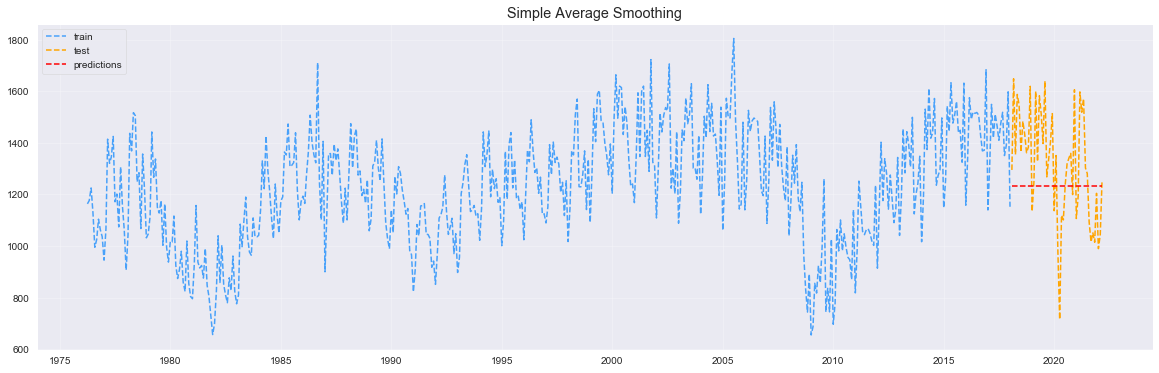

In [187]:
plt.plot(train_time, train, '#48A1FA', linestyle="--", label="train")
plt.plot(test_time, test, color='orange', linestyle="--", label="test")
plt.plot(test_time, simple_avg_preds, 'r--', label="predictions")
plt.legend(loc='upper left')
plt.title("Simple Average Smoothing")
plt.grid(alpha=0.3);

`B. Single Exponential`

In [190]:
from statsmodels.tsa.api import SimpleExpSmoothing

single = SimpleExpSmoothing(train).fit(optimized=True)
single_preds = np.round(single.forecast(len(test)), 3)
single_mse = mse(test, single_preds)

# displaying first 10 observations.
display(pd.DataFrame({'Actual' : test, 
              'Predictions' : single_preds}).head(10))

print("MSE: ", single_mse)

,Actual,Predictions
0,1294.694,1340.355
1,1647.975,1340.355
2,1354.484,1340.355
3,1587.518,1340.355
4,1544.695,1340.355
5,1363.887,1340.355
6,1483.169,1340.355
7,1432.993,1340.355
8,1361.288,1340.355
9,1383.388,1340.355


MSE:  2235283.269482


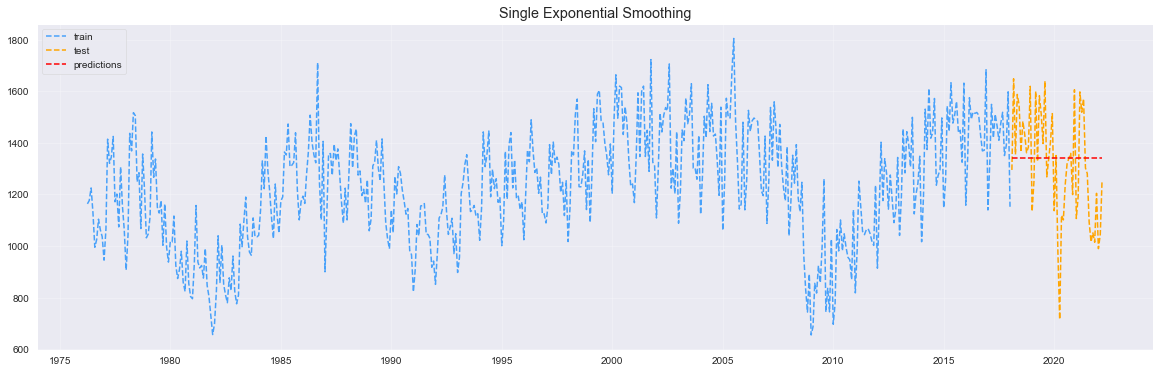

In [191]:
plt.plot(train_time, train, '#48A1FA', linestyle="--", label="train")
plt.plot(test_time, test, color='orange', linestyle="--", label="test")
plt.plot(test_time, single_preds, 'r--', label="predictions")
plt.legend(loc='upper left')
plt.title("Single Exponential Smoothing")
plt.grid(alpha=0.3);

`C. Double Exponential`

In [192]:
from statsmodels.tsa.api import Holt

double = Holt(train).fit(optimized=True)
double_preds = double.forecast(len(test))
double_mse = mse(test, double_preds)

# displaying first 10 observations.
display(pd.DataFrame({'Actual' : test, 
              'Predictions' : double_preds}).head(10))

print("MSE: ", double_mse)

,Actual,Predictions
0,1294.694,1342.690800
1,1647.975,1343.031753
2,1354.484,1343.372707
3,1587.518,1343.713661
4,1544.695,1344.054615
5,1363.887,1344.395569
6,1483.169,1344.736523
7,1432.993,1345.077477
8,1361.288,1345.418431
9,1383.388,1345.759385


MSE:  2318620.8891350282


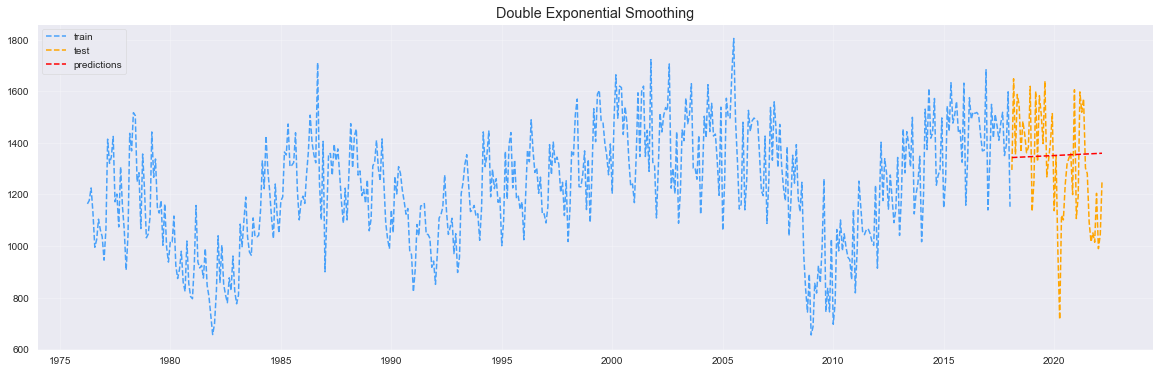

In [194]:
plt.plot(train_time, train, '#48A1FA', linestyle="--", label="train")
plt.plot(test_time, test, color='orange', linestyle="--", label="test")
plt.plot(test_time, double_preds, 'r--', label="predictions")
plt.legend(loc='upper left')
plt.title("Double Exponential Smoothing")
plt.grid(alpha=0.3);

`D. Triple Exponential`

In [219]:
from statsmodels.tsa.api import ExponentialSmoothing

triple = ExponentialSmoothing(train,
                              trend=None,
                              seasonal=None,
                              seasonal_periods=12).fit(optimized=True)
triple_preds = triple.forecast(len(test))
triple_mse = mse(test, triple_preds)
# displaying first 10 observations.
display(pd.DataFrame({'Actual' : test, 
              'Predictions' : triple_preds}).head(10))

print("MSE: ", triple_mse)

,Actual,Predictions
0,1294.694,1340.354723
1,1647.975,1340.354723
2,1354.484,1340.354723
3,1587.518,1340.354723
4,1544.695,1340.354723
5,1363.887,1340.354723
6,1483.169,1340.354723
7,1432.993,1340.354723
8,1361.288,1340.354723
9,1383.388,1340.354723


MSE:  2235282.558966974


In [220]:
data_dict = {'MSE':[simple_mse, single_mse, double_mse, triple_mse]}
df = pd.DataFrame(data_dict, index=['simple', 'single', 'double', 'triple'])
display(df)

,MSE
simple,2.533501e+06
single,2.235283e+06
double,2.318621e+06
triple,2.235283e+06
